# Linear Regression
## Question 1
Make a class called LinearRegression which provides two functions : fit and predict. Try to implement it from scratch. If stuck, refer to the examples folder.

In [70]:
import numpy as np


class LinearRegression:
    def __init__(self,learning_rate,iters):
        self.lr = learning_rate
        self.it = iters
    def fit(self,X_train,Y_train):
        n_sample,n_feature = X_train.shape
        Y_train = Y_train.reshape(-1,1)
        self.w = np.zeros((n_feature,1))
        self.b = np.zeros((1,1))
        for i in range(self.it):
            h = -(Y_train - np.dot(X_train,self.w)- self.b)/n_sample
            dw = np.dot(X_train.T,h)
            db = np.sum(h).reshape(1,1)
            self.w -= self.lr*dw
            self.b -= self.lr*db
    def predict(self,X_test):
        Y_predicted = np.array(np.dot(X_test,self.w))+self.b
        print(Y_predicted)
        return Y_predicted

## Question 2

Use the dataset https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction (*).
1. Read it using pandas.
2. Check for **null values**.
3. For each of the columns (except the first and last), plot the column values in the X-axis against the last column of prices in the Y-axis.
4. Remove the unwanted columns.
5. Split the dataset into train and test data. Test data size = 25% of total dataset.
6. **Normalize** the X_train and X_test using MinMaxScaler from sklearn.preprocessing.
7. Fit the training data into the model created in question 1 and predict the testing data.
8. Use **mean square error and R<sup>2</sup>** from sklearn.metrics as evaluation criterias.
9. Fit the training data into the models of the same name provided by sklearn.linear_model and evaluate the predictions using MSE and R<sup>2</sup>.
10. Tune the hyperparameters of your models (learning rate, epochs) to achieve losses close to that of the sklearn models.

Note : (*) To solve this question, you may proceed in any of the following ways :
1. Prepare the notebook in Kaggle, download it and submit it separately with the other questions.
2. Download the dataset from kaggle. Upload it to the session storage in Colab.
3. Use Colab data directly in Colab. [Refer here](https://www.kaggle.com/general/74235). For this, you need to create kaggle API token. Before submitting, hide or remove the API token.

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

dp = pd.read_csv(r'C:\Users\chand\summer_proj_back files\Week_1_submission\ML Assignment\Real estate.csv')
df = pd.DataFrame(dp)
print(df.shape)
df_na = df.dropna()
print(df_na.shape)
print(df.columns)

# plt.scatter()


(414, 8)
(414, 8)
Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')


<function matplotlib.pyplot.show(close=None, block=None)>

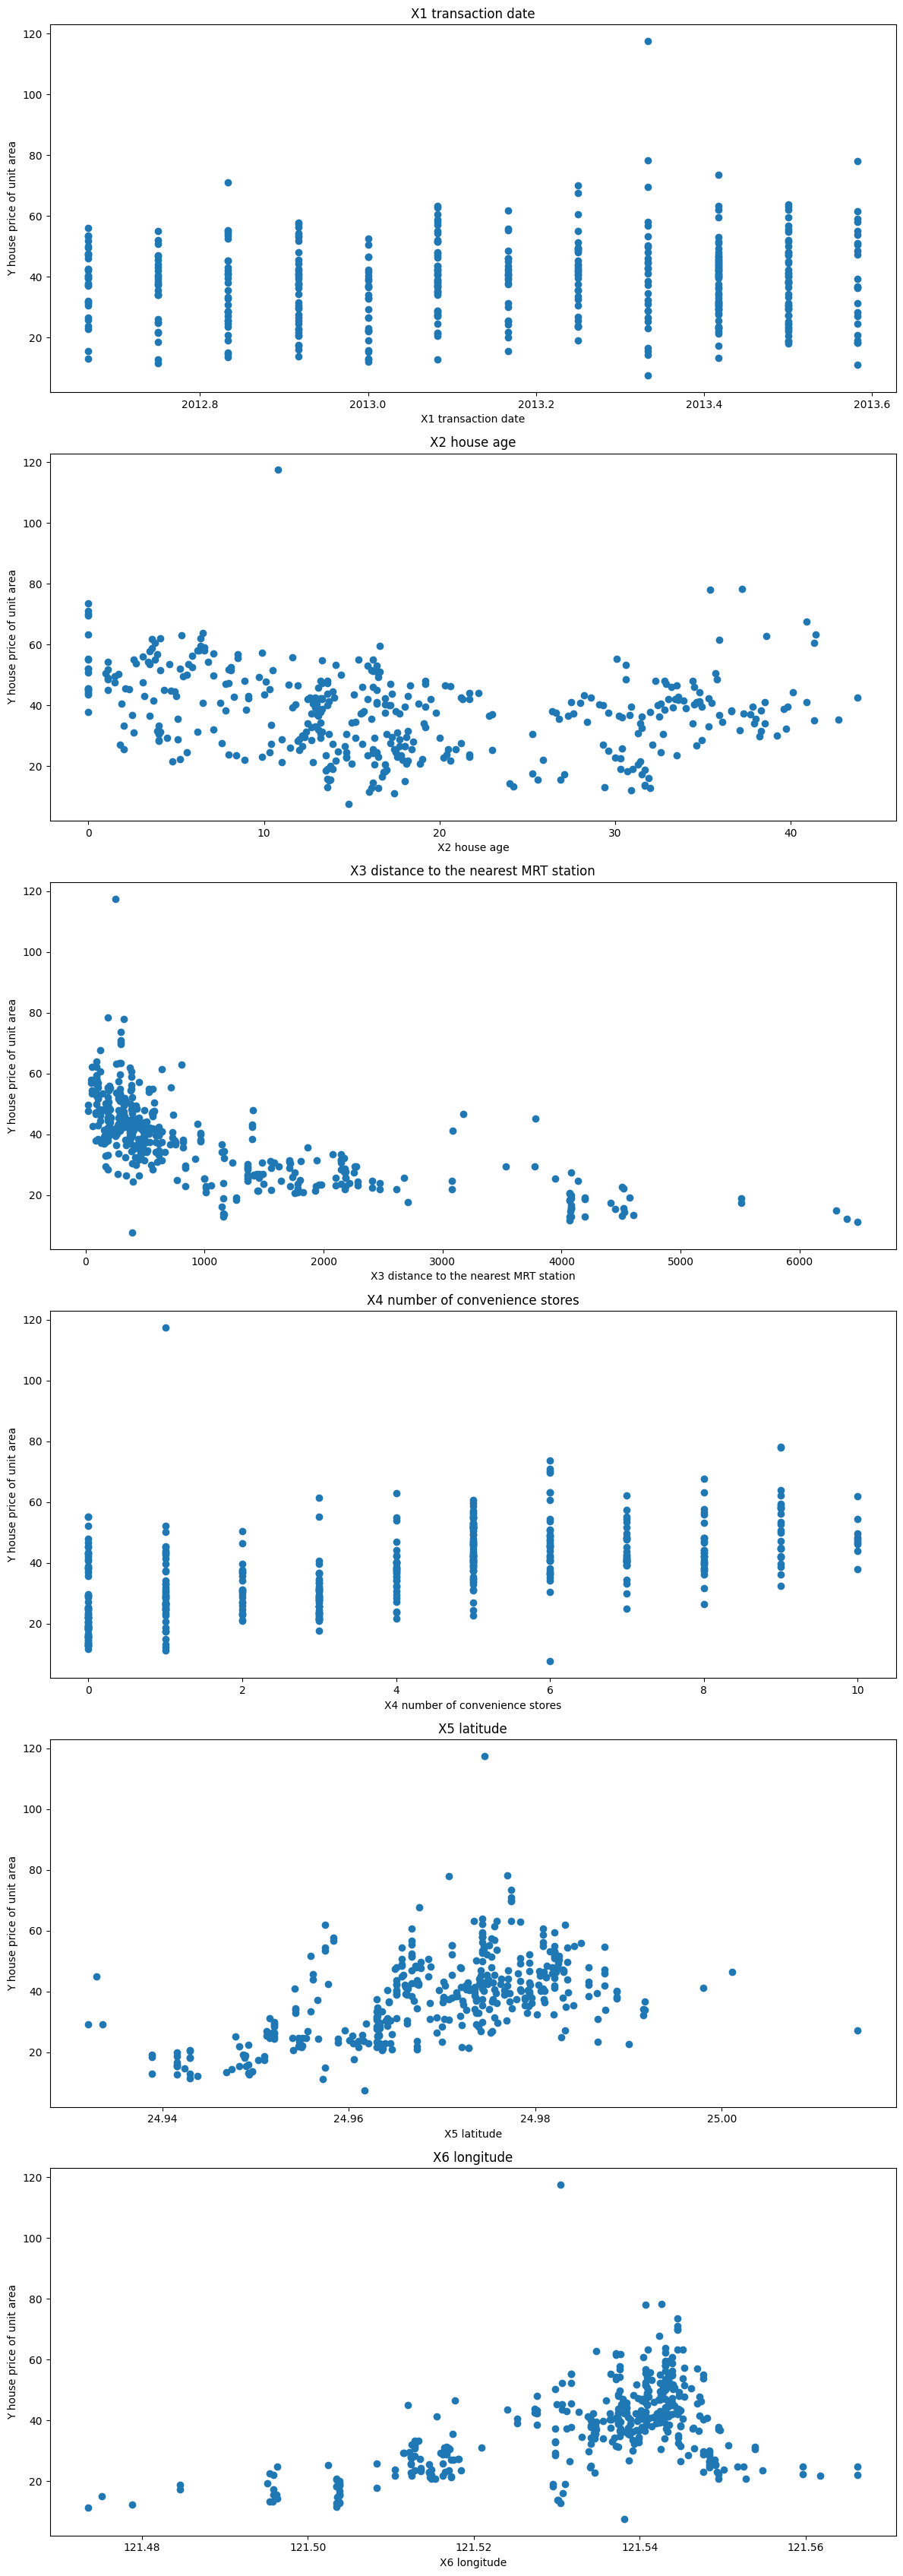

In [72]:
c=1
plt.figure(figsize=(12,34 ))
for i in df.columns[1:7]:
    plt.subplot(6,1,c)
    c=c+1
    
    plt.scatter(df[i],df['Y house price of unit area'])
    plt.xlabel(i)
    plt.ylabel('Y house price of unit area')
    plt.title(i)
plt.tight_layout()
plt.show

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
col = ['No','X1 transaction date','X4 number of convenience stores']
df_mod = df.drop(columns = col)
X = df_mod.drop(columns = 'Y house price of unit area')
scaler = MinMaxScaler()##normalised using min max scaler
X_norm = scaler.fit_transform(X)
X = pd.DataFrame(X_norm)

Y= df_mod['Y house price of unit area']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25)
x_train = x_train.values
y_train = y_train.values
x_test = x_test.values
y_test = y_test.values


In [74]:
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
linear_regressor = LinearRegression(0.1,2500)
linear_regressor.fit(x_train,y_train)
y_predicted = linear_regressor.predict(x_test)
mse = mean_squared_error(y_test,y_predicted)
r2 = r2_score(y_test,y_predicted)

[[49.238459  ]
 [39.56617045]
 [43.03503756]
 [36.66286935]
 [29.28328652]
 [38.01172382]
 [38.12676219]
 [34.38996285]
 [41.08392506]
 [46.93763195]
 [48.21939121]
 [39.53661088]
 [12.33625716]
 [40.44941289]
 [15.11958897]
 [41.36807121]
 [14.51769925]
 [43.03081355]
 [47.23118837]
 [15.43961571]
 [43.09320917]
 [32.90038061]
 [39.29750424]
 [34.31678492]
 [12.98005328]
 [28.0618562 ]
 [24.92748842]
 [33.30887289]
 [42.13200116]
 [47.09182395]
 [38.92456223]
 [42.78888839]
 [46.26179981]
 [48.1220672 ]
 [40.50523018]
 [35.96515147]
 [37.55331179]
 [29.9805431 ]
 [47.88285589]
 [34.50951512]
 [33.06860943]
 [48.3467412 ]
 [36.81828376]
 [47.72026407]
 [50.48793433]
 [47.76671887]
 [46.51375896]
 [38.79709607]
 [37.59009698]
 [44.61719736]
 [15.19601173]
 [41.60763951]
 [45.67132916]
 [37.3924016 ]
 [32.56274255]
 [26.93693207]
 [47.57959941]
 [43.23207219]
 [30.20691355]
 [42.65459584]
 [48.75125686]
 [39.77467216]
 [15.38183095]
 [34.2000748 ]
 [41.02066728]
 [37.91162168]
 [47.51724

In [75]:
from sklearn.linear_model import LinearRegression
sklearn_lr = LinearRegression()
sklearn_lr.fit(x_train,y_train)
y_predict_sklearn = sklearn_lr.predict(x_test)
mse_sklearn = mean_squared_error(y_test,y_predict_sklearn)
r2_sklearn = r2_score(y_test,y_predict_sklearn)
print("The error due to linear regression model",mse,r2)
print("The error due to sklearn linear regression model",mse_sklearn,r2_sklearn)


The error due to linear regression model 108.94613496555016 0.48747970689255493
The error due to sklearn linear regression model 106.71512432497677 0.49797515244272583


# Logistic Regression
## Question 3

The breast cancer dataset is a binary classification dataset commonly used in machine learning tasks. It is available in scikit-learn (sklearn) as part of its datasets module.
Here is an explanation of the breast cancer dataset's components:

* Features (X):

 * The breast cancer dataset consists of 30 numeric features representing different characteristics of the FNA images. These features include mean, standard error, and worst (largest) values of various attributes such as radius, texture, smoothness, compactness, concavity, symmetry, fractal dimension, etc.

* Target (y):

 * The breast cancer dataset is a binary classification problem, and the target variable (y) represents the diagnosis of the breast mass. It contains two classes:
    * 0: Represents a malignant (cancerous) tumor.
    * 1: Represents a benign (non-cancerous) tumor.

Complete the code given below in place of the "..."

1. Load the dataset from sklearn.datasets
2. Separate out the X and Y columns.
3. Normalize the X data using MinMaxScaler or StandardScaler.
4. Create a train-test-split. Take any suitable test size.

In [76]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import numpy as np

data= load_breast_cancer()
x = data.data
y = data.target
standScale = StandardScaler()
x_norm = standScale.fit_transform(x)
X_train,X_test,Y_train,Y_test = train_test_split(x_norm,y,test_size=0.2,random_state=42)



5. Write code for the sigmoid function and Logistic regression.


In [77]:
def sigmoid(z):
   return 1/(1+np.exp(-z))

def sigmoid_derivative(z):
    return (sigmoid(z)*(1-sigmoid(z)))
  

class LogisticRegression_:
    def __init__(self, learning_rate, epochs):
      #Initialise the hyperparameters of the model
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)
        self.weights = np.zeros((n_features,1))
        self.bias = np.zeros((1,1))

        #Implement the GD algortihm
        for _ in range(self.epochs):
            z = np.dot(X,self.weights)+self.bias
            y_pred = sigmoid(z)

            dw = np.dot(X.T,(y_pred-y))/n_samples
            db = np.sum(y_pred-y)/n_samples

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
      #Write the predict function
      z = sigmoid(np.dot(X,self.weights)+self.bias)
      y_pred = [0 if i<=0.5 else 1 for i in z]
      return y_pred

6. Fit your model on the dataset and make predictions.
7. Compare your model with the Sklearn Logistic Regression model. Try out all the different penalties.
8. Print accuracy_score in each case using sklearn.metrics .

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logi_reg = LogisticRegression_(0.01,2500)
logi_reg.fit(X_train,Y_train)
Y_predicted = logi_reg.predict(X_test)
accuracy = accuracy_score(Y_test,Y_predicted)
print("the accuracy score of Class LogisticRegression_",accuracy)
penalties = ['l1', 'l2', None] 
for penalty in penalties:
    sklearn_logreg_model = LogisticRegression(penalty=penalty, solver='saga',max_iter=6000, random_state=42)
    sklearn_logreg_model.fit(X_train, Y_train)
    y_pred_sklearn_model = sklearn_logreg_model.predict(X_test)
    accuracy_sklearn_model = accuracy_score(Y_test, Y_predicted)
    print(f"Accuracy score for sklearn model with penalty '{penalty}':", accuracy_sklearn_model)


the accuracy score of Class LogisticRegression_ 0.9912280701754386
Accuracy score for sklearn model with penalty 'l1': 0.9912280701754386
Accuracy score for sklearn model with penalty 'l2': 0.9912280701754386
Accuracy score for sklearn model with penalty 'None': 0.9912280701754386


9. For the best model in each case (yours and scikit-learn), print the classification_report using sklearn.metrics .
10. For the best model in each case (yours and scikit-learn), print the confusion_matrix using sklearn.metrics .

In [79]:
from sklearn.metrics import classification_report,confusion_matrix
print("The classification report of class LogisticRegression_",classification_report(Y_test,Y_predicted))
print("The confusion matrix of class LogisticRegression_",confusion_matrix(Y_test,Y_predicted))

The classification report of class LogisticRegression_               precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

The confusion matrix of class LogisticRegression_ [[42  1]
 [ 0 71]]


# KNN
## Question 4

How accurately can a K-Nearest Neighbors (KNN) model classify different types of glass based on a glass classification dataset consisting of 214 samples and 7 classes? Use the kaggle dataset "https://www.kaggle.com/datasets/uciml/glass".

Context: This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

1. Load the data as you did in the 2nd question.
2. Extract the X and Y columns.
3. Split it into training and testing datasets.

In [80]:
import numpy as np
import pandas as pd
data = pd.read_csv(r'C:\Users\chand\summer_proj_back files\Week_1_submission\ML Assignment\glass.csv')
df = pd.DataFrame(data)
col = ['Type']
X= df.drop(columns = col )
Y = df[col]
X= np.array(X)
Y = np.array(Y)
Y = Y.ravel()
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)


4. Define Euclidean distance.
5. Build the KNN model.
6. Fit the model on the training data. (Note : you may require to change the type of the data from pandas dataframe to numpy arrays. To do that, just do this X=np.array(X) and so on...)

In [81]:
from collections import Counter

def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))
class KNearestNeighbours:
    def __init__(self,k):
        self.k = k
    def fit(self,x,y):
        self.x_train = x
        self.y_train = y
    def predict_helper(self,x1):
        prediction = [euclidean_distance(x1,x2) for x2 in self.x_train]
        indices = np.argsort(prediction[:self.k])
        labels = [self.y_train[i] for i in indices]
        c = Counter(labels).most_common()
        return c[0][0]
    
    def predict(self,x_test_k):
        predicted_value = [self.predict_helper(xi) for xi in x_test_k]
        return np.array(predicted_value)
    


7. Make predictions. Find their accuracy using accuracy_score. Try different k values. k=3 worked well in our case.
8. Compare with the sklearn model (from sklearn.neighbors import KNeighborsClassifier)

In [82]:
from sklearn.neighbors import KNeighborsClassifier
sklearn_knn = KNeighborsClassifier()
knn_classifier = KNearestNeighbours(k=3)
knn_classifier.fit(x_train,y_train)
y_predicted_knn = knn_classifier.predict(x_test)
accuracy_knn = accuracy_score(y_test,y_predicted_knn)
sklearn_knn.fit(x_train,y_train)
y_predicted_knn_sklearn = sklearn_knn.predict(x_test)
accuracy_knn_sklearn = accuracy_score(y_test,y_predicted_knn_sklearn)

 

In [83]:
print("The score of KNearestNeighbour is",accuracy_knn)
print("The score of KNearestNeighbour from sklearn class is",accuracy_knn)

The score of KNearestNeighbour is 0.32558139534883723
The score of KNearestNeighbour from sklearn class is 0.32558139534883723
